In [1]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import MmCorpus
from gensim.corpora import Dictionary
from collections import Counter, defaultdict
from numpy.random import seed
import re
from metadata.metadata import ACL_metadata
from _topic_modeling.lda_loader import Loader
import _pickle as pkl
from metadata import Gender
from _storage.storage import FileDir
import matplotlib.pyplot as plt
import numpy as np
import logging
from os.path import join
import gensim 
fd = FileDir()
seed(1)
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

Using TensorFlow backend.
/afs/inf.ed.ac.uk/user/s14/s1427590/miniconda3/envs/mlp3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
loader = Loader()

loaded corpus index from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm.index
initializing corpus reader from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/acl_bow10.mm
accepted corpus with 22278 documents, 63996 features, 10941296 non-zero entries
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda
loading expElogbeta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.expElogbeta.npy with mmap=None
loading eta from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.eta.npy with mmap=None
setting ignored attribute id2word to None
setting ignored attribute dispatcher to None
setting ignored attribute state to None
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda
loading LdaModel object from /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldaseed310lda.state
loaded /afs/inf.ed.ac.uk/user/s14/s1427590/Honours-LDA/aan/save/ldas

In [3]:
lda = loader.model
lda.id2word = loader.id2word
corpus = loader.corpus
dictionary = loader.dic
dids = loader.doc_ids
doc_topics = loader.doc_topics
topic_corresp = loader.topic_corresp
acl = ACL_metadata()
df = acl.modeling_df
topic_corresp[15] = "StatisticalParsing"

Remember to use acl.modeling_files and modeling_df for topic modeling


In [5]:
important_confs = ["ACL", "EMNLP","EACL","COLING","CoNLL"]

In [15]:
for y in range(1980,2014):
conference_topics_proportions = dict(defaultdict(int)) # P(topic|gender)'
for c in important_confs:
    conference_topics_proportions[c] = defaultdict(int)
conf_norm = defaultdict(int)
male_norm = 0
males_topics = []
for i, file in enumerate(acl.modeling_files):
 
    topics = doc_topics[i]

    venue = df.loc[acl.get_id(file)]["venue"]
    if venue in important_confs:      
        for topic, p in topics:
            conference_topics_proportions[venue][topic_corresp[topic]] += p
        conf_norm[venue] += 1
for venue in important_confs:
    for idx in range(100):
        conference_topics_proportions[venue][topic_corresp[idx]] /= conf_norm[venue]

In [16]:
conference_topics_proportions

{'ACL': defaultdict(int,
             {'StatisticalParsing': 0.022622850753479543,
              'Topic 0 #AnaphoraResolution': 3.9613020070156666e-06,
              'Topic 1 #MultiLingualResources': 5.692397848433911e-10,
              'Topic 10 #WebSearch+Wikipedia': 1.0505263351735532e-09,
              'Topic 14 #SpellCorrection': 0.0096573137293561352,
              'Topic 15 #POSTagging': 0.013300316925227654,
              'Topic 16 #Dialog': 2.9978775164445935e-06,
              'Topic 17 #FiniteStateModels(Automata)': 0.013537975653790429,
              'Topic 18 #Multimodal(MainlyGeneration)': 0.0074808874095312825,
              'Topic 19 #Morphology': 0.0073215579806333976,
              'Topic 20 #MachineLearningClassification': 7.7120810923668727e-06,
              'Topic 21 #JapaneseNLP(notsogood)': 0.0068731695335356047,
              'Topic 22 #random(PronounsCommonnouns)': 9.0825217169782542e-10,
              'Topic 23 #NamedEntityRecognition': 2.3731684695254415e-06

In [82]:
rv_topics = dict()
k = 0
for i in topic_corresp:
    if topic_corresp[i] not in rv_topics:
        rv_topics[topic_corresp[i]] = k
        k+=1

In [39]:
for c in important_confs:
    topics_m = list(reversed(sorted(conference_topics_proportions[c].items(), key=lambda x: x[1])))
    print(c + " & ")
    k = 0
    for (t,score) in topics_m[:10]:
        if "random" in t:
            continue
        if k== 5:
            break
        s = t.split(" ")[-1].replace("#","")
        q = re.sub( r"([A-Z](?=[a-z]))", r" \1", s)
       
        print(str(k+1) + " " + s + "\\\\  & ",end="")
        k += 1
    print("\\\\")

ACL & 
1 DependencyParsing\\  & 2 ClassicParsing\\  & 3 StatisticalParsing\\  & 4 CategorialGrammar/Logic\\  & 5 StatisticalMachineTranslation(MorePhraseBased)\\  & \\
EMNLP & 
1 DependencyParsing\\  & 2 StatisticalMachineTranslation(MorePhraseBased)\\  & 3 StatisticalParsing\\  & 4 RelationExtraction\\  & 5 MachineTranslation(NonStatistical+Bitexts)\\  & \\
EACL & 
1 ClassicParsing\\  & 2 CategorialGrammar/Logic\\  & 3 SyntacticTheory\\  & 4 DependencyParsing\\  & 5 StatisticalParsing\\  & \\
COLING & 
1 ClassicParsing\\  & 2 CategorialGrammar/Logic\\  & 3 SyntacticTheory\\  & 4 StatisticalParsing\\  & 5 DependencyParsing\\  & \\
CoNLL & 
1 DependencyParsing\\  & 2 POSTagging\\  & 3 SpellCorrection\\  & 4 Chunking/MemoryBasedModels\\  & 5 StatisticalParsing\\  & \\


## Shannon Jensen Divergence

In [139]:
x = list(range(1965,2017))
prZ_y_fem = dict(defaultdict(lambda: [0] * len(x)))
for v in important_confs:
    prZ_y_fem[v] = defaultdict(lambda: [0] * len(x))

normD_y_fem = defaultdict(lambda : [0] * len(x))
for i, file in enumerate(acl.modeling_files):
    fid = acl.get_id(file)
    data = df.loc[fid]
    year = data["year"]
    venue = data["venue"]
    topics = doc_topics[i]
    if venue not in important_confs:
        continue
    for topic, p in topics:
        prZ_y_fem[venue][topic_corresp[topic]][int(year) - 1965] += p
    normD_y_fem[venue][int(year) - 1965] += 1

for venue in important_confs:
    for topic_name, yg in prZ_y_fem[venue].items():
        for y in x:
            if normD_y_fem[venue][int(y) - 1965] != 0:
                prZ_y_fem[venue][topic_name][int(y) - 1965]  /= normD_y_fem[venue][int(y) - 1965]

0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0117119942686
EMNLP 0.0117119942686
0.018282122169
EMNLP 0.018282122169
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0
EMNLP 0.0
0.0336710038982
EMNLP 0.0336710038982
0.0316874684492
EMNLP 0.0316874684492
0.00145573859862
EMNLP 0.00145573859862
0.0210384492092
EMNLP 0.0210384492092
0.0211024479818
EMNLP 0.0211024479818
0.0116886636203
EMNLP 0.0116886636203
0.0252056037262
EMNLP 0.0252056037262
0.0217751328017
EMNLP 0.0217751328017
0.0165131754628
EMNLP 0.0165131754628
0.00740310766821
EMNLP 0.00740310766821
0.0261289415286
EMNLP 0.0261289415286
0.0293547365302
EMNLP 0.0293547365302
0.0155850456855
EMNLP 0.0155850456855
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EM

EMNLP 0.0615823715495
0.0587230019981
EMNLP 0.0587230019981
0.0805013565201
EMNLP 0.0805013565201
0.077234246941
EMNLP 0.077234246941
0.0793248995004
EMNLP 0.0793248995004
0.0738175927571
EMNLP 0.0738175927571
0.0754499903124
EMNLP 0.0754499903124
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.00199006449012
EMNLP 0.00199006449012
0.0499786866081
EMNLP 0.0499786866081
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.020855421269
EMNLP 0.020855421269
0.0271442662174
EMNLP 0.0271442662174
0.0357880061923
EMNLP 0.0357880061923
0.0324904815155
EMNLP 0.0324904815155
0.0432665598869
EMNLP 0.0432665598869
0.0226751042844
EMNLP 0.0226751042844
0.0206996428512
EMNLP 0.0206996428512
0.0253134875187
EMNLP 0.0253134875187
0.0340228228

EMNLP 0.00793086277823
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0
EMNLP 0.0
0.0179262151554
EMNLP 0.0179262151554
0.0124564827215
EMNLP 0.0124564827215
0.0226039736783
EMNLP 0.0226039736783
0.0145752092547
EMNLP 0.0145752092547
0.0087797296431
EMNLP 0.0087797296431
0.0191453901803
EMNLP 0.0191453901803
0.0181531643166
EMNLP 0.0181531643166
0.014670016892
EMNLP 0.014670016892
0.01743839924
EMNLP 0.01743839924
0.0167336808409
EMNLP 0.0167336808409
0.0163028207949
EMNLP 0.0163028207949
0.0162249879781
EMNLP 0.0162249879781
0.0173428556393
EMNLP 0.0173428556393
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0363090969117
EMNLP 0.0363090969117
0.0302562151825
EMNLP 0.0302562151825
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0352349

0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0167126052368
EMNLP 0.0167126052368
0.0101601836596
EMNLP 0.0101601836596
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0180287401133
EMNLP 0.0180287401133
0.00385794198893
EMNLP 0.00385794198893
0.019529407358
EMNLP 0.019529407358
0.016398911255
EMNLP 0.016398911255
0.00887469771604
EMNLP 0.00887469771604
0.00860923414438
EMNLP 0.00860923414438
0.00964630270823
EMNLP 0.00964630270823
0.0137339236846
EMNLP 0.0137339236846
0.013761022492
EMNLP 0.013761022492
0.0134520217858
EMNLP 0.0134520217858
0.00994606305863
EMNLP 0.00994606305863
0.0151261737392
EMNLP 0.0151261737392
0.0152932538587
EMNLP 0.0152932538587
0.0209218932942
EMNLP 0.0209218932942
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 

EMNLP 0.0029398471086
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0
EMNLP 0.0
0.012804416642
EMNLP 0.012804416642
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.00242383193126
EMNLP 0.00242383193126
0.00127435374716
EMNLP 0.00127435374716
0.0
EMNLP 0.0
0.00451273703261
EMNLP 0.00451273703261
0.00360019570823
EMNLP 0.00360019570823
0.00612630333763
EMNLP 0.00612630333763
0.00100974065586
EMNLP 0.00100974065586
0.00723265810892
EMNLP 0.00723265810892
0.00224209136629
EMNLP 0.00224209136629
0.00609289774121
EMNLP 0.00609289774121
0.00331856966822
EMNLP 0.00331856966822
0.0106952408462
EMNLP 0.0106952408462
0.0107957434341
EMNLP 0.0107957434341
0.00642614455533
EMNLP 0.00642614455533
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 

0.00605003977761
EMNLP 0.00605003977761
0.00401282961128
EMNLP 0.00401282961128
0.00634730060955
EMNLP 0.00634730060955
0.00222831360635
EMNLP 0.00222831360635
0.00109116181448
EMNLP 0.00109116181448
0.00471006423635
EMNLP 0.00471006423635
0.00176264556115
EMNLP 0.00176264556115
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0135517550262
EMNLP 0.0135517550262
0.00588962467511
EMNLP 0.00588962467511
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.00106370998488
EMNLP 0.00106370998488
0.000521011077788
EMNLP 0.000521011077788
0.011307937408
EMNLP 0.011307937408
0.00253375095948
EMNLP 0.00253375095948
0.00289905410143
EMNLP 0.00289905410143
0.00463903698618
EMNLP 0.00463903698618
0.00565450426813
EMNLP 0.00565450426813
0.00

EMNLP 0.00224689166164
0.0022316376865
EMNLP 0.0022316376865
0.00117743367915
EMNLP 0.00117743367915
0.0030842837462
EMNLP 0.0030842837462
0.00133753175661
EMNLP 0.00133753175661
0.00208558271583
EMNLP 0.00208558271583
0.00277030022758
EMNLP 0.00277030022758
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.0188530796859
EMNLP 0.0188530796859
0.0160610360736
EMNLP 0.0160610360736
0
EMNLP 0
0
EMNLP 0
0
EMNLP 0
0.00340526948269
EMNLP 0.00340526948269
0.0
EMNLP 0.0
0.0
EMNLP 0.0
0.0
EMNLP 0.0
0.00015666046211
EMNLP 0.00015666046211
0.0
EMNLP 0.0
0.000122975228836
EMNLP 0.000122975228836
0.0
EMNLP 0.0
0.000195332086114
EMNLP 0.000195332086114
0.000179778714084
EMNLP 0.000179778714084
0.000270156114384
EMNLP 0.000

0
EACL 0
0
EACL 0
0.00806320041409
EACL 0.00806320041409
0
EACL 0
0
EACL 0
0
EACL 0
0.0164996855968
EACL 0.0164996855968
0.0
EACL 0.0
0
EACL 0
0.00339804999402
EACL 0.00339804999402
0
EACL 0
0
EACL 0
0.00251303830782
EACL 0.00251303830782
0
EACL 0
0
EACL 0
0.00308001190853
EACL 0.00308001190853
0
EACL 0
0.00232060802183
EACL 0.00232060802183
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.00556122555323
EACL 0.00556122555323
0
EACL 0
0.00295555896997
EACL 0.00295555896997
0
EACL 0
0.00182905991069
EACL 0.00182905991069
0
EACL 0
0.00276159762482
EACL 0.00276159762482
0
EACL 0
0.00374399647597
EACL 0.00374399647597
0
EACL 0
0.00479633502149
EACL 0.00479633502149
0
EACL 0
0.00597329558747
EACL 0.00597329558747
0
EACL 0
0
EACL 0
0
EACL 0
0.00650032698792
EACL 0.00650032698792
0
EACL 0
0
EACL 0
0
EACL 0
0.0205598410698
EACL 0.0205598410698
0.0
EACL 0.0
0
EACL

EACL 0.00834966804052
0
EACL 0
0
EACL 0
0.0134668908648
EACL 0.0134668908648
0
EACL 0
0
EACL 0
0.00698260405414
EACL 0.00698260405414
0
EACL 0
0.00437755290071
EACL 0.00437755290071
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.00565042239613
EACL 0.00565042239613
0
EACL 0
0.00797692151847
EACL 0.00797692151847
0
EACL 0
0.00846524021975
EACL 0.00846524021975
0
EACL 0
0.00361141361975
EACL 0.00361141361975
0
EACL 0
0.010047317713
EACL 0.010047317713
0
EACL 0
0.0127531335327
EACL 0.0127531335327
0
EACL 0
0.0429957769116
EACL 0.0429957769116
0
EACL 0
0
EACL 0
0
EACL 0
0.034118991603
EACL 0.034118991603
0
EACL 0
0
EACL 0
0
EACL 0
0.0
EACL 0.0
0.0
EACL 0.0
0
EACL 0
0.0629439987285
EACL 0.0629439987285
0
EACL 0
0
EACL 0
0.0482418597376
EACL 0.0482418597376
0
EACL 0
0
EACL 0
0.0502762467785
EACL 0.0502762467785
0
EACL 0
0.0446993220268
EACL 0.0446993220268
0


EACL 0.0156308073521
0
EACL 0
0
EACL 0
0.0205948640895
EACL 0.0205948640895
0
EACL 0
0
EACL 0
0.0389376025895
EACL 0.0389376025895
0
EACL 0
0.0493665523232
EACL 0.0493665523232
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.00622594528268
EACL 0.00622594528268
0
EACL 0
0.0010380472176
EACL 0.0010380472176
0
EACL 0
0.00126975284014
EACL 0.00126975284014
0
EACL 0
0.000554872572615
EACL 0.000554872572615
0
EACL 0
0.00303120120184
EACL 0.00303120120184
0
EACL 0
0.00146477065126
EACL 0.00146477065126
0
EACL 0
0.00472428800451
EACL 0.00472428800451
0
EACL 0
0
EACL 0
0
EACL 0
0.004061893041
EACL 0.004061893041
0
EACL 0
0
EACL 0
0
EACL 0
0.0
EACL 0.0
0.0
EACL 0.0
0
EACL 0
0.00269484070217
EACL 0.00269484070217
0
EACL 0
0
EACL 0
0.00291335975587
EACL 0.00291335975587
0
EACL 0
0
EACL 0
0.00111869825153
EACL 0.00111869825153
0
EACL 0
0.00629732669527
EACL 0.006297

EACL 0.00810334643766
0
EACL 0
0.00367819528527
EACL 0.00367819528527
0
EACL 0
0.00342683411814
EACL 0.00342683411814
0
EACL 0
0.0117628150715
EACL 0.0117628150715
0
EACL 0
0.0109527981796
EACL 0.0109527981796
0
EACL 0
0
EACL 0
0
EACL 0
0.0239847738789
EACL 0.0239847738789
0
EACL 0
0
EACL 0
0
EACL 0
0.0
EACL 0.0
0.0
EACL 0.0
0
EACL 0
0.0123455378466
EACL 0.0123455378466
0
EACL 0
0
EACL 0
0.0149887706845
EACL 0.0149887706845
0
EACL 0
0
EACL 0
0.00713848678692
EACL 0.00713848678692
0
EACL 0
0.0136238472364
EACL 0.0136238472364
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.00217432646526
EACL 0.00217432646526
0
EACL 0
0.00497240972918
EACL 0.00497240972918
0
EACL 0
0.00805136549433
EACL 0.00805136549433
0
EACL 0
0.0105814895152
EACL 0.0105814895152
0
EACL 0
0.0102098743347
EACL 0.0102098743347
0
EACL 0
0.0116928814
EACL 0.0116928814
0
EACL 0
0.00191875791

0
EACL 0
0
EACL 0
0.000672769029699
EACL 0.000672769029699
0
EACL 0
0.000956539883773
EACL 0.000956539883773
0
EACL 0
0.000491262332206
EACL 0.000491262332206
0
EACL 0
0.000743156514274
EACL 0.000743156514274
0
EACL 0
0.00159420190896
EACL 0.00159420190896
0
EACL 0
0.00342711704791
EACL 0.00342711704791
0
EACL 0
0.00345963384564
EACL 0.00345963384564
0
EACL 0
0
EACL 0
0
EACL 0
0.0191842047911
EACL 0.0191842047911
0
EACL 0
0
EACL 0
0
EACL 0
0.0
EACL 0.0
0.0
EACL 0.0
0
EACL 0
0.0201022853803
EACL 0.0201022853803
0
EACL 0
0
EACL 0
0.0150703003089
EACL 0.0150703003089
0
EACL 0
0
EACL 0
0.0283909572279
EACL 0.0283909572279
0
EACL 0
0.0308943271484
EACL 0.0308943271484
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.00419681393312
EACL 0.00419681393312
0
EACL 0
0.00567829730403
EACL 0.00567829730403
0
EACL 0
0.00318682552722
EACL 0.00318682552722
0
EACL 0
0.00

0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.00158870466952
EACL 0.00158870466952
0
EACL 0
0.00033308723975
EACL 0.00033308723975
0
EACL 0
0.00123942906816
EACL 0.00123942906816
0
EACL 0
0.0
EACL 0.0
0
EACL 0
0.0
EACL 0.0
0
EACL 0
0.000400941373507
EACL 0.000400941373507
0
EACL 0
0.000302483357254
EACL 0.000302483357254
0
EACL 0
0
EACL 0
0
EACL 0
0.0057343719783
EACL 0.0057343719783
0
EACL 0
0
EACL 0
0
EACL 0
0.0
EACL 0.0
0.0
EACL 0.0
0
EACL 0
0.00952706250682
EACL 0.00952706250682
0
EACL 0
0
EACL 0
0.00358162836239
EACL 0.00358162836239
0
EACL 0
0
EACL 0
0.00818525231317
EACL 0.00818525231317
0
EACL 0
0.00566982047724
EACL 0.00566982047724
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0
EACL 0
0.107192695737
EACL 0.107192695737
0
EACL 0
0.112852008195
EACL 0.112852008195
0
EACL 0
0.104476762634
EACL 0.104476762634
0

0.0066698922909
COLING 0.0066698922909
0
COLING 0
0.00585522349392
COLING 0.00585522349392
0
COLING 0
0.00527570152164
COLING 0.00527570152164
0
COLING 0
0
COLING 0
0
COLING 0
0.00187206710525
COLING 0.00187206710525
0
COLING 0
0.00382901081316
COLING 0.00382901081316
0
COLING 0
0
COLING 0
0
COLING 0
0.00280431555922
COLING 0.00280431555922
0
COLING 0
0
COLING 0
0.00622113767235
COLING 0.00622113767235
0
COLING 0
0.00999758903155
COLING 0.00999758903155
0
COLING 0
0.00531275774069
COLING 0.00531275774069
0
COLING 0
0
COLING 0
0
COLING 0
0.00949015368995
COLING 0.00949015368995
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0.012582705668
COLING 0.012582705668
0
COLING 0
0.0145304666658
COLING 0.0145304666658
0
COLING 0
0
COLING 0
0
COLING 0
0.0182697183768
COLING 0.0182697183768
0
COLING 0
0.0213048247108
COLING 0.0213048247108
0
COLING 0
0.0328464116873
COLING 0.0328464116873
0
COLING 0
0.025339286075
COLING 0.025339286075
0
COLING 0
0.0170592934503
COLING 0.0170592

COLING 0
0.00433489269645
COLING 0.00433489269645
0
COLING 0
0
COLING 0
0
COLING 0
0.00202082018318
COLING 0.00202082018318
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0.00231546810226
COLING 0.00231546810226
0
COLING 0
0.00396464776531
COLING 0.00396464776531
0
COLING 0
0
COLING 0
0
COLING 0
0.0023805414499
COLING 0.0023805414499
0
COLING 0
0.00533147353261
COLING 0.00533147353261
0
COLING 0
0.00676898492089
COLING 0.00676898492089
0
COLING 0
0.00974787039082
COLING 0.00974787039082
0
COLING 0
0.00942753066151
COLING 0.00942753066151
0
COLING 0
0.00740723354027
COLING 0.00740723354027
0
COLING 0
0
COLING 0
0
COLING 0
0.00618981122464
COLING 0.00618981122464
0
COLING 0
0.0303010943814
COLING 0.0303010943814
0
COLING 0
0.0300821291383
COLING 0.0300821291383
0
COLING 0
0
COLING 0
0
COLING 0
0.0285145099597
COLING 0.0285145099597
0
COLING 0
0.0227543543887
COLING 0.0227543543887
0
COLING 0
0
COLING 0
0
COLING 0
0.0149907418538
COLING 0.0149907418538
0
COLING 0
0
COLI

0
COLING 0
0.00275324858723
COLING 0.00275324858723
0
COLING 0
0
COLING 0
0
COLING 0
0.00614083833255
COLING 0.00614083833255
0
COLING 0
0.00311269722198
COLING 0.00311269722198
0
COLING 0
0.00652365562312
COLING 0.00652365562312
0
COLING 0
0.00416842001621
COLING 0.00416842001621
0
COLING 0
0.0065691489127
COLING 0.0065691489127
0
COLING 0
0.00701441518154
COLING 0.00701441518154
0
COLING 0
0
COLING 0
0
COLING 0
0.0069695932997
COLING 0.0069695932997
0
COLING 0
0.0068832772929
COLING 0.0068832772929
0
COLING 0
0.0106277841937
COLING 0.0106277841937
0
COLING 0
0
COLING 0
0
COLING 0
0.0029898538981
COLING 0.0029898538981
0
COLING 0
0.00187773397867
COLING 0.00187773397867
0
COLING 0
0
COLING 0
0
COLING 0
0.00305006022338
COLING 0.00305006022338
0
COLING 0
0
COLING 0
0.000519232021466
COLING 0.000519232021466
0
COLING 0
0.0024557904193
COLING 0.0024557904193
0
COLING 0
0.00468465936533
COLING 0.00468465936533
0
COLING 0
0
COLING 0
0
COLING 0
0.00182327444429
COLING 0.00182327444429
0
COL

COLING 0
0.00117385903532
COLING 0.00117385903532
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0
COLING 0
0.00314723188672
COLING 0.00314723188672
0
COLING 0
0.00351979372377
COLING 0.00351979372377
0
COLING 0
0
COLING 0
0
COLING 0
0.00494707167027
COLING 0.00494707167027
0
COLING 0
0.00562835281914
COLING 0.00562835281914
0
COLING 0
0.00560597334215
COLING 0.00560597334215
0
COLING 0
0.00513740634839
COLING 0.00513740634839
0
COLING 0
0.00510445250177
COLING 0.00510445250177
0
COLING 0
0.00686433017649
COLING 0.00686433017649
0
COLING 0
0
COLING 0
0
COLING 0
0.0154873371478
COLING 0.0154873371478
0
COLING 0
0.0151115076957
COLING 0.0151115076957
0
COLING 0
0.0217584233584
COLING 0.0217584233584
0
COLING 0
0
COLING 0
0
COLING 0
0.0407535393774
COLING 0.0407535393774
0
COLING 0
0.0359173491101
COLING 0.0359173491101
0
COLING 0
0
COLING 0
0
COLING 0
0.0333090741719
COLING 0.0333090741719
0
COLING 0
0
COLING 0
0.010988267462
COLING 0.010988267462
0
COLING 0
0.0030080819233
COLIN

COLING 0
0
COLING 0
0
COLING 0
0.00227369735475
COLING 0.00227369735475
0
COLING 0
0.00149315666673
COLING 0.00149315666673
0
COLING 0
0
COLING 0
0
COLING 0
0.00161623503939
COLING 0.00161623503939
0
COLING 0
0.00140849992374
COLING 0.00140849992374
0
COLING 0
0.00330779239506
COLING 0.00330779239506
0
COLING 0
0.00139104915693
COLING 0.00139104915693
0
COLING 0
0.00175289766709
COLING 0.00175289766709
0
COLING 0
0.00460708111019
COLING 0.00460708111019
0
COLING 0
0
COLING 0
0
COLING 0
0.00440963035025
COLING 0.00440963035025
0
COLING 0
0.00802706672325
COLING 0.00802706672325
0
COLING 0
0.0143120200177
COLING 0.0143120200177
0
COLING 0
0
COLING 0
0
COLING 0
0.0223177944713
COLING 0.0223177944713
0
COLING 0
0.0230769069781
COLING 0.0230769069781
0
COLING 0
0
COLING 0
0
COLING 0
0.0334785223607
COLING 0.0334785223607
0
COLING 0
0
COLING 0
0.0150842060923
COLING 0.0150842060923
0
COLING 0
0.0160957420553
COLING 0.0160957420553
0
COLING 0
0.0169104301892
COLING 0.0169104301892
0
COLING 0


0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.0130995323104
CoNLL 0.0130995323104
0
CoNLL 0
0.00606381034953
CoNLL 0.00606381034953
0.00264591445491
CoNLL 0.00264591445491
0.00468981352286
CoNLL 0.00468981352286
0.013042308619
CoNLL 0.013042308619
0.00179650486968
CoNLL 0.00179650486968
0
CoNLL 0
0.0176272468131
CoNLL 0.0176272468131
0.00854490673838
CoNLL 0.00854490673838
0.0141852978509
CoNLL 0.0141852978509
0.00508788048421
CoNLL 0.00508788048421
0.0
CoNLL 0.0
0.00315997821196
CoNLL 0.00315997821196
0.0110622539822
CoNLL 0.0110622539822
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 

CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.0122560314033
CoNLL 0.0122560314033
0
CoNLL 0
0.0131564178625
CoNLL 0.0131564178625
0.0077210793992
CoNLL 0.0077210793992
0.00895182817134
CoNLL 0.00895182817134
0.0334604855025
CoNLL 0.0334604855025
0.0401853129813
CoNLL 0.0401853129813
0
CoNLL 0
0.0245435638787
CoNLL 0.0245435638787
0.0110926306313
CoNLL 0.0110926306313
0.0131330840301
CoNLL 0.0131330840301
0.00895055396866
CoNLL 0.00895055396866
0.00955318699916
CoNLL 0.00955318699916
0.0140840490165
CoNLL 0.0140840490165
0.00459357199506
CoNLL 0.00459357199506
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.0522935086162
CoNLL 0.052293

CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.00919461710069
CoNLL 0.00919461710069
0
CoNLL 0
0.00429141350603
CoNLL 0.00429141350603
0.00272658102338
CoNLL 0.00272658102338
0.0
CoNLL 0.0
0.00327985999427
CoNLL 0.00327985999427
0.0
CoNLL 0.0
0
CoNLL 0
0.00437488932697
CoNLL 0.00437488932697
0.00364010456703
CoNLL 0.00364010456703
0.00124273678291
CoNLL 0.00124273678291
0.00153519675621
CoNLL 0.00153519675621
0.0
CoNLL 0.0
0.00290908872237
CoNLL 0.00290908872237
0.00249156578556
CoNLL 0.00249156578556
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0


CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.0216088567416
CoNLL 0.0216088567416
0
CoNLL 0
0.0156600308355
CoNLL 0.0156600308355
0.0143607726102
CoNLL 0.0143607726102
0.0166006065021
CoNLL 0.0166006065021
0.0144708239596
CoNLL 0.0144708239596
0.0177700293364
CoNLL 0.0177700293364
0
CoNLL 0
0.0258941086977
CoNLL 0.0258941086977
0.0227404971426
CoNLL 0.0227404971426
0.00831979904501
CoNLL 0.00831979904501
0.0199801792919
CoNLL 0.0199801792919
0.0177296187774
CoNLL 0.0177296187774
0.0321324815694
CoNLL 0.0321324815694
0.0121264706715
CoNLL 0.0121264706715
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNL

CoNLL 0
0.00131806367062
CoNLL 0.00131806367062
0.00587991757888
CoNLL 0.00587991757888
0.0
CoNLL 0.0
0.0
CoNLL 0.0
0.0
CoNLL 0.0
0
CoNLL 0
0.000717935941083
CoNLL 0.000717935941083
0.000247656067678
CoNLL 0.000247656067678
0.000624680045966
CoNLL 0.000624680045966
0.00200346680088
CoNLL 0.00200346680088
0.000635699114478
CoNLL 0.000635699114478
0.000315054481183
CoNLL 0.000315054481183
0.0131616191678
CoNLL 0.0131616191678
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.0053585593691
CoNLL 0.0053585593691
0
CoNLL 0
0.00192796517228
CoNLL 0.00192796517228
0.00341643283237
CoNLL 0.00341643283237
0.00206730927632
CoNLL 0.00206730927632
0.00770499371781
CoNLL 0.007704993

CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0.00158579301729
CoNLL 0.00158579301729
0
CoNLL 0
0.0
CoNLL 0.0
0.00142909726583
CoNLL 0.00142909726583
0.0013406125323
CoNLL 0.0013406125323
0.00318269770215
CoNLL 0.00318269770215
0.00286896514384
CoNLL 0.00286896514384
0
CoNLL 0
0.0138685411773
CoNLL 0.0138685411773
0.00145312281404
CoNLL 0.00145312281404
0.00528802354592
CoNLL 0.00528802354592
0.00894831498342
CoNLL 0.00894831498342
0.0
CoNLL 0.0
0.000765202652325
CoNLL 0.000765202652325
0.0150349526893
CoNLL 0.0150349526893
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 0
0
CoNLL 

In [192]:
P = dict()
x = list(range(1965,2017))
for venue in important_confs:
    P[venue] = defaultdict(lambda: [0] * len(rv_topics))
    for y in x:
        for topic_name in topic_corresp.values():
            P[venue][int(y) - 1965][rv_topics[topic_name]] =  prZ_y_fem[venue][topic_name][int(y) - 1965]
            p

In [129]:
x = list(range(1965,2017))
prZ_y_fem = dict(defaultdict(lambda: [0] * len(x)))
for v in important_confs:
    prZ_y_fem[v] = defaultdict(lambda: [0] * len(x))

normD_y_fem = defaultdict(lambda : [0] * len(x))
for i, file in enumerate(acl.modeling_files):
    fid = acl.get_id(file)
    data = df.loc[fid]
    year = data["year"]
    venue = data["venue"]
    topics = doc_topics[i]
    if venue not in important_confs:
        continue
    for topic, p in topics:
        prZ_y_fem[venue][topic_corresp[topic]][int(year) - 1965] += p
    normD_y_fem[venue][int(year) - 1965] += 1

NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
NAACL
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANLP
ANL

COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING
COLING

EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNL

Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language
Workshop On Speech And Natural Language


CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
CL
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
LREC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
MUC
M

ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL


ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL
ACL


TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
TINLP
Workshop On Syntactic And Semantic Complexity In Natural Language Processing Systems
Workshop On Syntactic And Semantic Complexity In Natural Language Processing Systems
Workshop On Syntactic And Semantic Complexity In Natural Language Processing Systems
Workshop On Syntactic And Semantic Complexity In Natural Language Processing Systems
Workshop On Syntactic And Semantic Complexity In Natural Language Processing Systems
Workshop On Syntactic And Semantic Complexity In Natural Language Proce

EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
EMNLP
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguistics
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguistics
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguistics
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguistics
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguistics
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguistics
Workshop On Effective Tools And Methodologies For Teaching Natural Language Processing And Computational Linguis

TextGraphs Workshop On Graph Based Methods For Natural Language Processing
TextGraphs Workshop On Graph Based Methods For Natural Language Processing
TextGraphs Workshop On Graph Based Methods For Natural Language Processing
TextGraphs Workshop On Graph Based Methods For Natural Language Processing
Coling 2008: Proceedings of the workshop Multi-source Multilingual Information Extraction and Summarization
Coling 2008: Proceedings of the workshop Multi-source Multilingual Information Extraction and Summarization
Coling 2008: Proceedings of the workshop Multi-source Multilingual Information Extraction and Summarization
Coling 2008: Proceedings of the workshop Multi-source Multilingual Information Extraction and Summarization
Coling 2008: Proceedings of the workshop Multi-source Multilingual Information Extraction and Summarization
Coling 2008: Proceedings of the workshop Multi-source Multilingual Information Extraction and Summarization
Coling 2008: Proceedings of the workshop Multi-sourc

CLP
CLP
CLP
CLP
CLP
CLP
CLP
CLP
CLP
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
INLG
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
SIGDIAL
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
IWCS
BioNLP 
BioNLP 
BioNLP 
BioNLP 
BioNLP 
BioNLP 
BioNLP 
BioNLP 
BioNLP 
BioNLP 


Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Linguistic Annotation Workshop
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balto-Slavonic Natural Language Processing
Workshop on Balt

EMNLP
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Spoken Language Translation
Workshop On Natural Language Processing For Communication Aids
Workshop On Natural Language Processing For Communication Aids
Workshop On Natural Language Processing For Communication Aids
Workshop On Natural Language Processing For Communication Aids
Workshop On Natural Language Processing For Communication Aids
Workshop On Natural Language Processing

In [131]:
P.keys()

dict_keys(['ACL', 'EMNLP', 'EACL', 'COLING', 'CoNLL'])

In [193]:
from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

1980 0.102516047262
1982 0.161586554585
1986 0.0866916998083
1988 0.0646639738566
1990 0.0613618767911
1992 0.0586129325536
1994 0.0991955151425
1996 0.0683579889193
2000 0.078721155277
2002 0.070750845696
2004 0.0251704556147
2008 0.0248565187398
2010 0.0198724218942
2014 0.0107343579736
1996 0.117320133724
1997 0.117185308012
2001 0.148350553083
2002 0.0579547128506
2003 0.0962874270097
2004 0.0529731441571
2005 0.0208588352545
2006 0.0275841449608
2007 0.0345287842229
2008 0.0260737838442
2009 0.0187517341978
2010 0.0203351595062
2011 0.0204066471117
2012 0.0188061164976
2013 0.0143242462564
2014 0.00707356676949
2000 0.11993471255
2002 0.145416299683
2004 0.198305283048
2008 0.125476418336
2010 0.126947159625
2014 0.104051475382


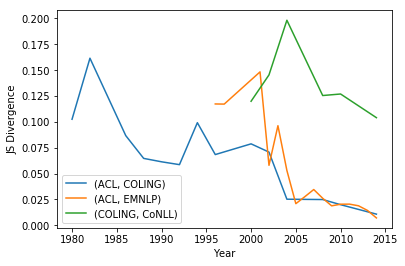

In [215]:
c1 = "ACL"
c2 = "COLING"
yrs = []
jj = []
for y in x:
        
    p1 = np.array(P[c1][y - 1965])
    p2 = np.array(P[c2][y - 1965])
    if normD_y_fem[c1][y - 1965] == 0 or normD_y_fem[c2][y - 1965] ==0:
        continue
    if np.sum(p1) == 0 or np.sum(p2) == 0:
        continue


    jsd = JSD(p1, p2)
    print(y, jsd)
    yrs.append(y)
    jj.append(jsd)
plt.plot(yrs, jj, label="({}, {})".format(c1,c2))
c1 = "ACL"
c2 = "EMNLP"
yrs = []
jj = []
for y in x:
        
    p1 = np.array(P[c1][y - 1965])
    p2 = np.array(P[c2][y - 1965])
    if normD_y_fem[c1][y - 1965] == 0 or normD_y_fem[c2][y - 1965] ==0:
        continue
    if np.sum(p1) == 0 or np.sum(p2) == 0:
        continue


    jsd = JSD(p1, p2)
    print(y, jsd)
    yrs.append(y)
    jj.append(jsd)
plt.plot(yrs, jj, label="({}, {})".format(c1,c2))
c1 = "COLING"
c2 = "CoNLL"
yrs = []
jj = []
for y in x:
        
    p1 = np.array(P[c1][y - 1965])
    p2 = np.array(P[c2][y - 1965])
    if normD_y_fem[c1][y - 1965] == 0 or normD_y_fem[c2][y - 1965] ==0:
        continue
    if np.sum(p1) == 0 or np.sum(p2) == 0:
        continue


    jsd = JSD(p1, p2)
    print(y, jsd)
    yrs.append(y)
    jj.append(jsd)
plt.plot(yrs, jj, label="({}, {})".format(c1,c2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("JS Divergence")
plt.savefig("plots/JSDivergence.pdf")
plt.show()

In [110]:
P["COLING"]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [28]:
t = "Topic 84 #NeuralNetworks/HumanCognition"
f = (females_topics_proportions[t]) / fem_norm
m = (males_topics_proportions[t]) / male_norm
plt.scatter([0],[f])
plt.scatter([0],[m])

In [68]:
females_topics = []
females_topics_proportions = defaultdict(int) # P(topic|gender)'
males_topics_proportions = defaultdict(int)
fem_norm = 0 # normalizer
male_norm = 0
males_topics = []
for i, file in enumerate(acl.modeling_files):
    try:
        topics = doc_topics[i]
        gender = df.loc[acl.get_id(file)]["genders"][0] #first author
        year = 
        if gender == Gender.female:
            for topic, p in topics:
                females_topics_proportions[topic_corresp[topic]] += p
            fem_norm +=1
        elif gender == Gender.male:
            for topic, p in topics:
                males_topics_proportions[topic_corresp[topic]] += p
            male_norm +=1
    except KeyError:
        pass

SyntaxError: invalid syntax (<ipython-input-68-d0bff7fed61f>, line 11)

In [68]:
man_topics = list(reversed(sorted(p_male.items(), key=lambda x: x[1])))

In [80]:
def plot_topic(tpc, name=None):
    if name == None:
        name = tpc.split(" ")[-1].replace("/","-")
    fig, ax = plt.subplots(1, 1)
    lst = prZ_y_male[tpc]
    ax.plot(x[:-1], lst[:-1], color=tableau20[0], label="Male")
    lst = prZ_y_fem[tpc]
    ax.plot(x[:-1], lst[:-1], color=tableau20[2], label="Female")
    b=np.arange(1965, 2016, 5)
    ax.set_ylabel("Odds ratio")
    ax.set_xticks(b)
    ax.set_title(name)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    plt.legend()
    plt.savefig(join(fd.plots, name +".pdf"))
    plt.show()
    

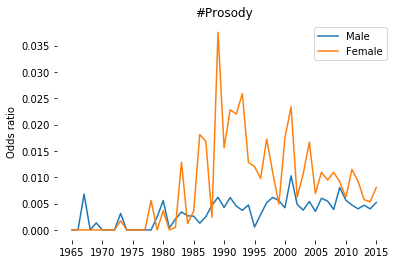

In [143]:
tpc = "Topic 62 #Prosody"
plot_topic(tpc, "#Prosody")

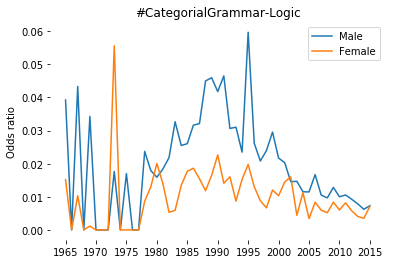

In [144]:
tpc = "Topic 72 #CategorialGrammar/Logic"
plot_topic(tpc)

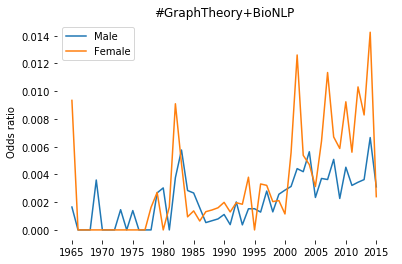

In [145]:
plot_topic("Topic 5 #GraphTheory+BioNLP")

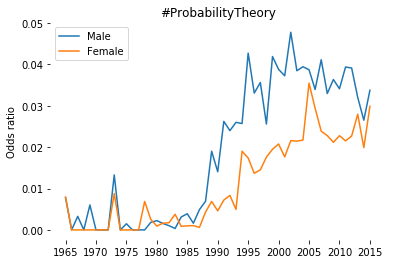

In [146]:
plot_topic("Topic 97 #ProbabilityTheory")

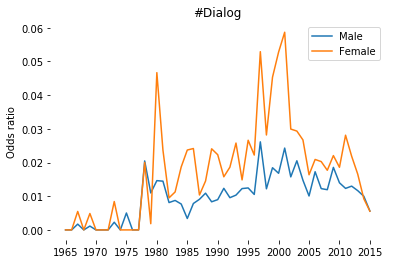

In [147]:
plot_topic("Topic 16 #Dialog")